In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
from shutil import copyfile
from google.colab import files

import zipfile
import matplotlib.pyplot as plt
import numpy as np
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
try:
    os.mkdir('./dataset/batik/')
    os.mkdir(os.path.join('./dataset/batik/', 'training'))
    os.mkdir(os.path.join('./dataset/batik/', 'validation'))
    
    os.mkdir(os.path.join('./dataset/batik/training', 'bali'))
    os.mkdir(os.path.join('./dataset/batik/training', 'betawi'))
    os.mkdir(os.path.join('./dataset/batik/training', 'cendrawasih'))
    os.mkdir(os.path.join('./dataset/batik/training', 'kawung'))
    os.mkdir(os.path.join('./dataset/batik/training', 'megamendung'))
    os.mkdir(os.path.join('./dataset/batik/training', 'parang'))
    os.mkdir(os.path.join('./dataset/batik/training', 'pekalongan'))
    os.mkdir(os.path.join('./dataset/batik/training', 'sekar'))
    os.mkdir(os.path.join('./dataset/batik/training', 'sidoluhur'))
    os.mkdir(os.path.join('./dataset/batik/training', 'jumputan'))

    os.mkdir(os.path.join('./dataset/batik/validation', 'bali'))
    os.mkdir(os.path.join('./dataset/batik/validation', 'betawi'))
    os.mkdir(os.path.join('./dataset/batik/validation', 'cendrawasih'))
    os.mkdir(os.path.join('./dataset/batik/validation', 'kawung'))
    os.mkdir(os.path.join('./dataset/batik/validation', 'megamendung'))
    os.mkdir(os.path.join('./dataset/batik/validation', 'parang'))
    os.mkdir(os.path.join('./dataset/batik/validation', 'pekalongan'))
    os.mkdir(os.path.join('./dataset/batik/validation', 'sekar'))
    os.mkdir(os.path.join('./dataset/batik/validation', 'sidoluhur'))
    os.mkdir(os.path.join('./dataset/batik/validation', 'jumputan'))

except OSError:
    pass

In [44]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    # YOUR CODE STARTS HERE
    if not os.path.exists(TRAINING): 
        os.makedirs(TRAINING) 

    if not os.path.exists(VALIDATION): 
        os.makedirs(VALIDATION)

    file_names = os.listdir(SOURCE) 
    file_number = len(file_names) 

    for index, file in enumerate(file_names): 
        if index < SPLIT_SIZE * file_number: 
          copyfile(os.path.join(SOURCE, file), os.path.join(TRAINING, file))
        else:
          copyfile(os.path.join(SOURCE, file), os.path.join(VALIDATION, file)) 
        
BALI_SOURCE_DIR = "./drive/MyDrive/data/batik/bali/"
BETAWI_SOURCE_DIR = "./drive/MyDrive/data/batik/betawi/"
CENDRAWASIH_SOURCE_DIR = "./drive/MyDrive/data/batik/cendrawasih/"
KAWUNG_SOURCE_DIR = "./drive/MyDrive/data/batik/kawung/"
MEGAMENDUNG_SOURCE_DIR = "./drive/MyDrive/data/batik/megamendung/"
PARANG_SOURCE_DIR = "./drive/MyDrive/data/batik/parang/"
PEKALONGAN_SOURCE_DIR = "./drive/MyDrive/data/batik/pekalongan/"
SEKAR_SOURCE_DIR = "./drive/MyDrive/data/batik/sekar/"
SIDOLUHUR_SOURCE_DIR = "./drive/MyDrive/data/batik/sidoluhur/"
JUMPUTAN_SOURCE_DIR = "./drive/MyDrive/data/batik/jumputan/"

TRAINING_BALI_DIR = "./dataset/batik/training/bali/"
TRAINING_BETAWI_DIR = "./dataset/batik/training/betawi/"
TRAINING_CENDRAWASIH_DIR = "./dataset/batik/training/cendrawasih/"
TRAINING_KAWUNG_DIR = "./dataset/batik/training/kawung/"
TRAINING_MEGAMENDUNG_DIR = "./dataset/batik/training/megamendung/"
TRAINING_PARANG_DIR = "./dataset/batik/training/parang/"
TRAINING_PEKALONGAN_DIR = "./dataset/batik/training/pekalongan/"
TRAINING_SEKAR_DIR = "./dataset/batik/training/sekar/"
TRAINING_SIDOLUHUR_DIR = "./dataset/batik/training/sidoluhur/"
TRAINING_JUMPUTAN_DIR = "./dataset/batik/training/jumputan/"

VALIDATION_BALI_DIR = "./dataset/batik/validation/bali/"
VALIDATION_BETAWI_DIR = "./dataset/batik/validation/betawi/"
VALIDATION_CENDRAWASIH_DIR = "./dataset/batik/validation/cendrawasih/"
VALIDATION_KAWUNG_DIR = "./dataset/batik/validation/kawung/"
VALIDATION_MEGAMENDUNG_DIR = "./dataset/batik/validation/megamendung/"
VALIDATION_PARANG_DIR = "./dataset/batik/validation/parang/"
VALIDATION_PEKALONGAN_DIR = "./dataset/batik/validation/pekalongan/"
VALIDATION_SEKAR_DIR = "./dataset/batik/validation/sekar/"
VALIDATION_SIDOLUHUR_DIR = "./dataset/batik/validation/sidoluhur/"
VALIDATION_JUMPUTAN_DIR = "./dataset/batik/validation/jumputan/"


split_size = .8
split_data(BALI_SOURCE_DIR, TRAINING_BALI_DIR,  VALIDATION_BALI_DIR, split_size)
split_data(BETAWI_SOURCE_DIR, TRAINING_BETAWI_DIR,  VALIDATION_BETAWI_DIR, split_size)
split_data(CENDRAWASIH_SOURCE_DIR, TRAINING_CENDRAWASIH_DIR,  VALIDATION_CENDRAWASIH_DIR, split_size)
split_data(KAWUNG_SOURCE_DIR, TRAINING_KAWUNG_DIR,  VALIDATION_KAWUNG_DIR, split_size)
split_data(MEGAMENDUNG_SOURCE_DIR, TRAINING_MEGAMENDUNG_DIR,  VALIDATION_MEGAMENDUNG_DIR, split_size)
split_data(PARANG_SOURCE_DIR, TRAINING_PARANG_DIR,  VALIDATION_PARANG_DIR, split_size)
split_data(PEKALONGAN_SOURCE_DIR, TRAINING_PEKALONGAN_DIR,  VALIDATION_PEKALONGAN_DIR, split_size)
split_data(SEKAR_SOURCE_DIR, TRAINING_SEKAR_DIR,  VALIDATION_SEKAR_DIR, split_size)
split_data(SIDOLUHUR_SOURCE_DIR, TRAINING_SIDOLUHUR_DIR, VALIDATION_SIDOLUHUR_DIR, split_size)
split_data(JUMPUTAN_SOURCE_DIR, TRAINING_JUMPUTAN_DIR, VALIDATION_JUMPUTAN_DIR, split_size)

In [45]:
train_bali = os.listdir(TRAINING_BALI_DIR)
train_betawi = os.listdir(TRAINING_BETAWI_DIR)
train_cendrawasih = os.listdir(TRAINING_CENDRAWASIH_DIR)
train_kawung = os.listdir(TRAINING_KAWUNG_DIR)
train_megamendung = os.listdir(TRAINING_MEGAMENDUNG_DIR)
train_parang = os.listdir(TRAINING_PARANG_DIR)
train_pekalongan = os.listdir(TRAINING_PEKALONGAN_DIR)
train_sekar = os.listdir(TRAINING_SEKAR_DIR)
train_sidoluhur = os.listdir(TRAINING_SIDOLUHUR_DIR)
train_jumputan = os.listdir(TRAINING_JUMPUTAN_DIR)

val_bali = os.listdir(VALIDATION_BALI_DIR)
val_betawi = os.listdir(VALIDATION_BETAWI_DIR)
val_cendrawasih = os.listdir(VALIDATION_CENDRAWASIH_DIR)
val_kawung = os.listdir(VALIDATION_KAWUNG_DIR)
val_megamendung = os.listdir(VALIDATION_MEGAMENDUNG_DIR)
val_parang = os.listdir(VALIDATION_PARANG_DIR)
val_pekalongan = os.listdir(VALIDATION_PEKALONGAN_DIR)
val_sekar = os.listdir(VALIDATION_SEKAR_DIR)
val_sidoluhur = os.listdir(VALIDATION_SIDOLUHUR_DIR)
val_jumputan = os.listdir(VALIDATION_JUMPUTAN_DIR)

print("Training")
print('bali :', len(train_bali))
print('betawi :', len(train_betawi))
print('cendrawasih :', len(train_cendrawasih))
print('kawung :', len(train_kawung))
print('megamendung :', len(train_megamendung))
print('parang :', len(train_parang))
print('pekalongan :', len(train_pekalongan))
print('sekar :', len(train_sekar))
print('sidoluhur :', len(train_sidoluhur))
print('jumputan :', len(train_jumputan))

print("/Validation")
print('bali :', len(val_bali))
print('betawi :', len(val_betawi))
print('cendrawasih :', len(val_cendrawasih))
print('kawung :', len(val_kawung))
print('megamendung :', len(val_megamendung))
print('parang :', len(val_parang))
print('pekalongan :', len(val_pekalongan))
print('sekar :', len(val_sekar))
print('sidoluhur :', len(val_sidoluhur))
print('jumputan :', len(val_jumputan))

Training
bali : 79
betawi : 80
cendrawasih : 79
kawung : 82
megamendung : 80
parang : 80
pekalongan : 80
sekar : 80
sidoluhur : 80
jumputan : 80
/Validation
bali : 19
betawi : 20
cendrawasih : 19
kawung : 20
megamendung : 20
parang : 20
pekalongan : 20
sekar : 20
sidoluhur : 20
jumputan : 20


In [55]:
BATCH_SIZE = 16
IMG_SIZE = (300, 300)

TRAINING_DIR = './dataset/batik/training/'
train_datagen = image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE, 
    shuffle=True
)

datagen = image.ImageDataGenerator(rescale = 1.0/255.0)
VALIDATION_DIR = './dataset/batik/validation/'
val_generator = datagen.flow_from_directory(
    VALIDATION_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=True
)


Found 800 images belonging to 10 classes.
Found 198 images belonging to 10 classes.


In [56]:
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 800 files belonging to 10 classes.


In [57]:

class_names = train_dataset.class_names

print(class_names)

['bali', 'betawi', 'cendrawasih', 'jumputan', 'kawung', 'megamendung', 'parang', 'pekalongan', 'sekar', 'sidoluhur']


InvalidArgumentError: ignored

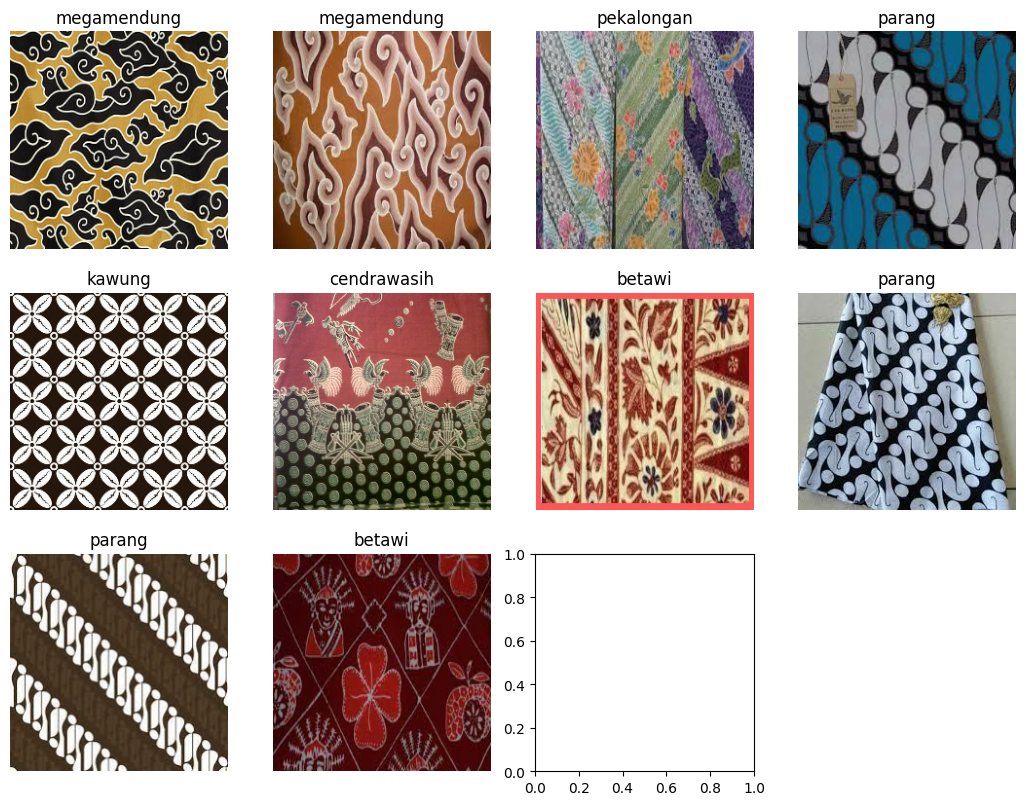

In [ ]:
plt.figure(figsize=(13, 13))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [58]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300,300,3)),
    #layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    #layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    #layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    #layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 35, 35, 64)      

In [59]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs['val_accuracy']
        if val_accuracy >= 0.8:
            print(f'Validation Accuracy reached 0.9 or higher. Stopping training.')
            self.model.stop_training = True

In [60]:
history = model.fit(train_generator,
                    epochs=500,
                    steps_per_epoch=len(train_generator),
                    validation_data=val_generator,
                    verbose = 1,
                    validation_steps=len(val_generator),
                    callbacks = [Callback()])

Epoch 1/500
50/50 [==============================] - 26s 384ms/step - loss: 2.2909 - accuracy: 0.1300 - val_loss: 2.2774 - val_accuracy: 0.1364
Epoch 2/500
50/50 [==============================] - 23s 472ms/step - loss: 2.2561 - accuracy: 0.1475 - val_loss: 2.1787 - val_accuracy: 0.2172
Epoch 3/500
50/50 [==============================] - 19s 384ms/step - loss: 2.1418 - accuracy: 0.2025 - val_loss: 2.1686 - val_accuracy: 0.2273
Epoch 4/500
50/50 [==============================] - 20s 403ms/step - loss: 2.1126 - accuracy: 0.2000 - val_loss: 2.0505 - val_accuracy: 0.2071
Epoch 5/500
50/50 [==============================] - 19s 385ms/step - loss: 2.0255 - accuracy: 0.2188 - val_loss: 2.0740 - val_accuracy: 0.2626
Epoch 6/500
50/50 [==============================] - 20s 405ms/step - loss: 2.0522 - accuracy: 0.2175 - val_loss: 2.0846 - val_accuracy: 0.2172
Epoch 7/500
50/50 [==============================] - 19s 373ms/step - loss: 2.0060 - accuracy: 0.2412 - val_loss: 1.9615 - val_accuracy:

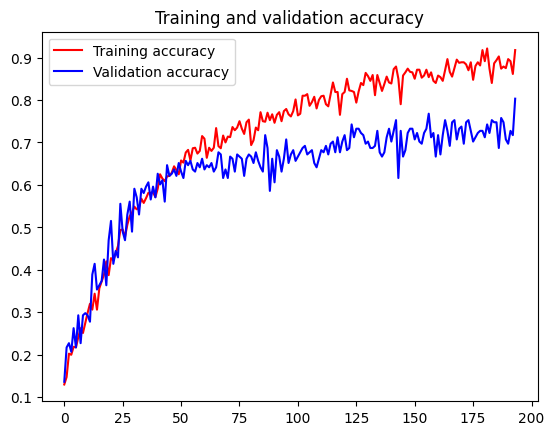

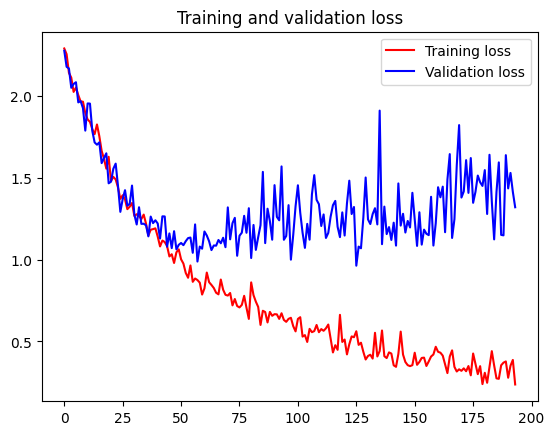

In [61]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving test megamendung.jpg to test megamendung (13).jpg
Saving test bali.jpg to test bali (13).jpg
Saving test sidoluhur.jpg to test sidoluhur (13).jpg
Saving test kawung.jpg to test kawung (13).jpg
Saving test sekar.jpg to test sekar (13).jpg


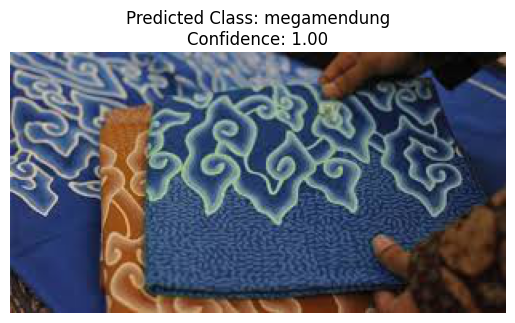

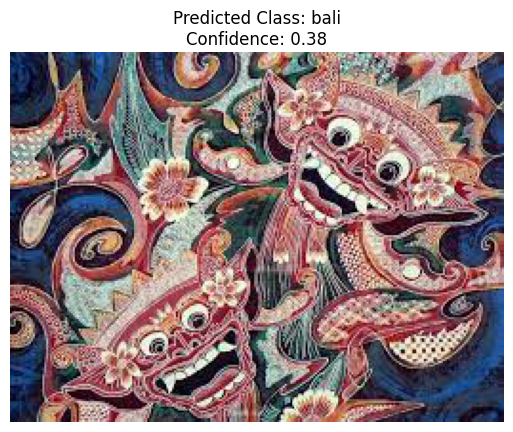

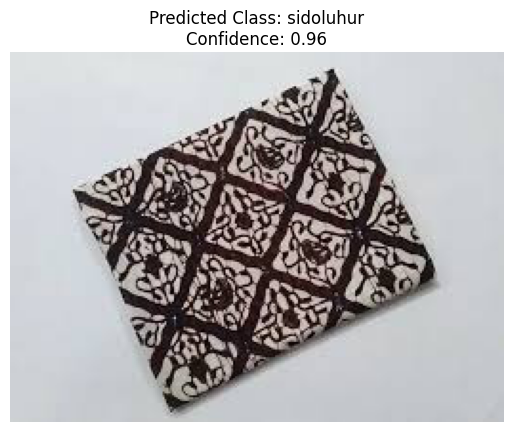

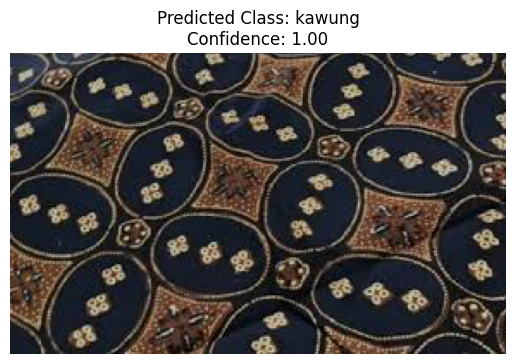

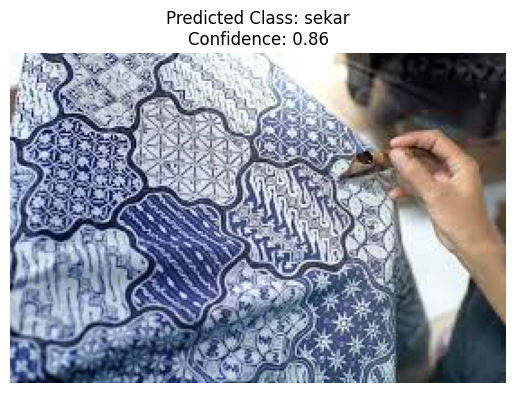

In [90]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array


# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Preprocess the image
uploaded = files.upload()

for fn in uploaded.keys():
  image_path = fn
  image = tf.keras.preprocessing.image.load_img(image_path, target_size=(300, 300))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = np.expand_dims(image, axis=0)
  image = tf.cast(image, dtype=tf.float32) / 255.0  # Perform data type conversion using tf.cast

    # Set the input tensor
  interpreter.set_tensor(input_details[0]['index'], image)

    # Run the inference
  interpreter.invoke()

    # Get the output tensor
  output = interpreter.get_tensor(output_details[0]['index'])

    # Postprocess the output
  class_index = np.argmax(output)
  confidence = output[0][class_index]
  class_name = class_names[class_index]  # Get the class name based on the class index

    # Print the predicted class name and confidence for each image
  img = plt.imread(image_path)
  plt.imshow(img)
  plt.axis('off')
  plt.title("Predicted Class: {}\nConfidence: {:.2f}".format(class_name, confidence))
  plt.show()

In [ ]:
tf.saved_model.save(model, 'model.pb')

In [ ]:
model.save('model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)